## Importing Libraraies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Kaggle\Projects\Major Project\Wine Classification.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [5]:
df.shape

(1599, 12)

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [7]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

## Visualization

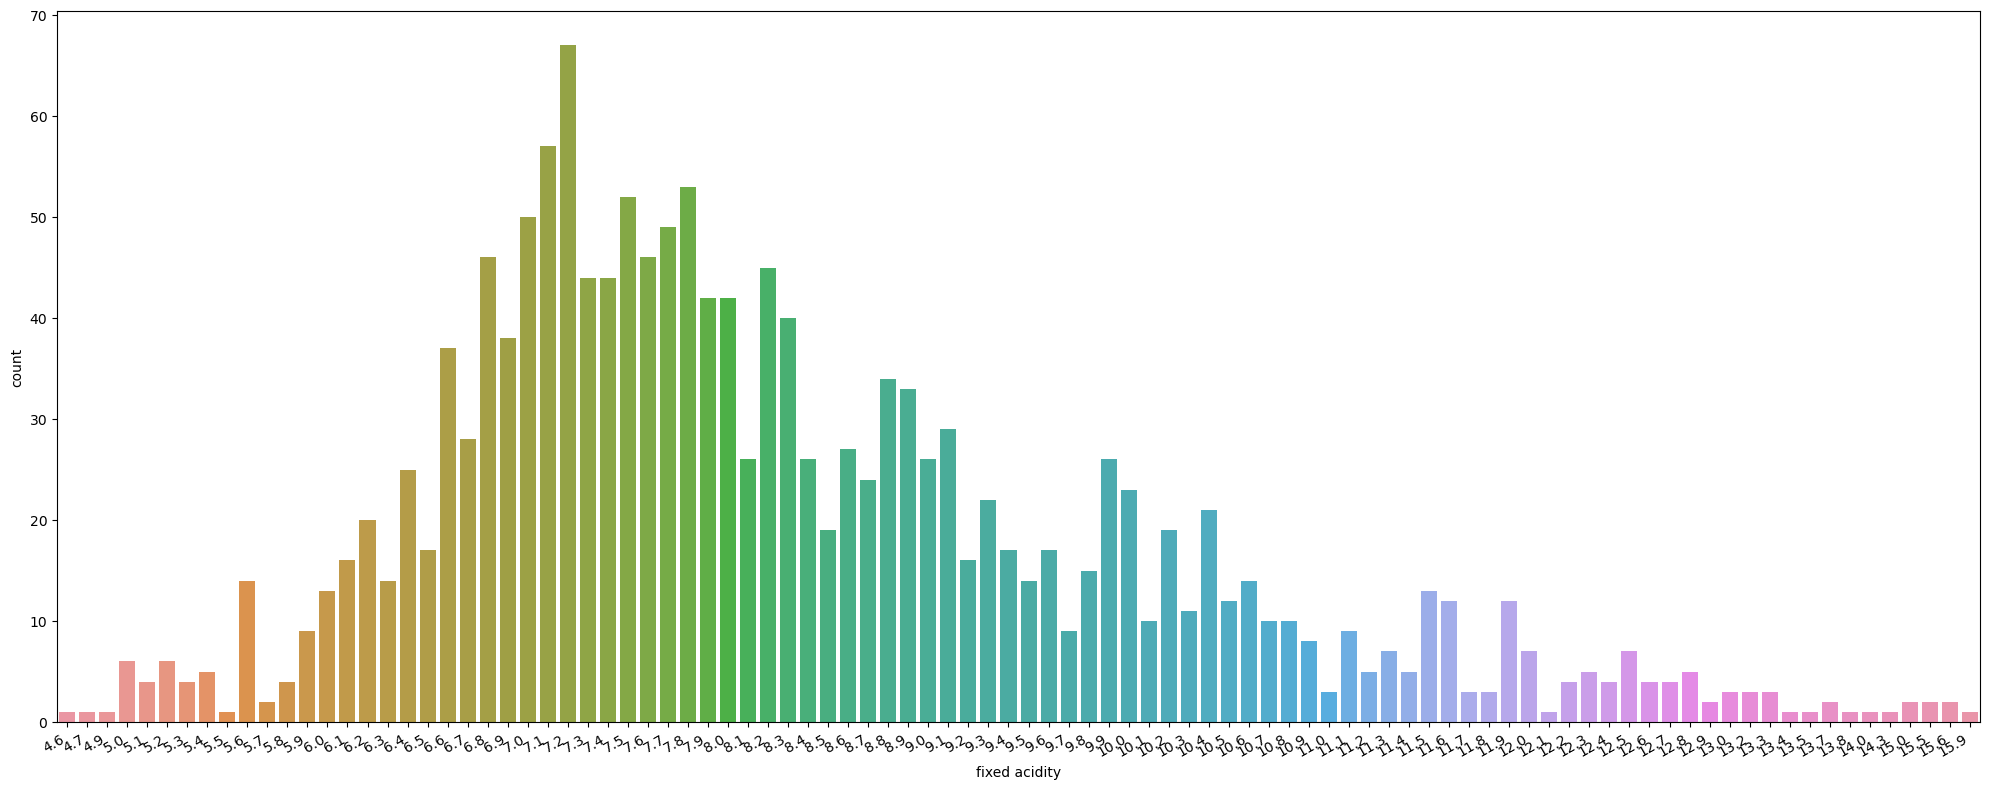

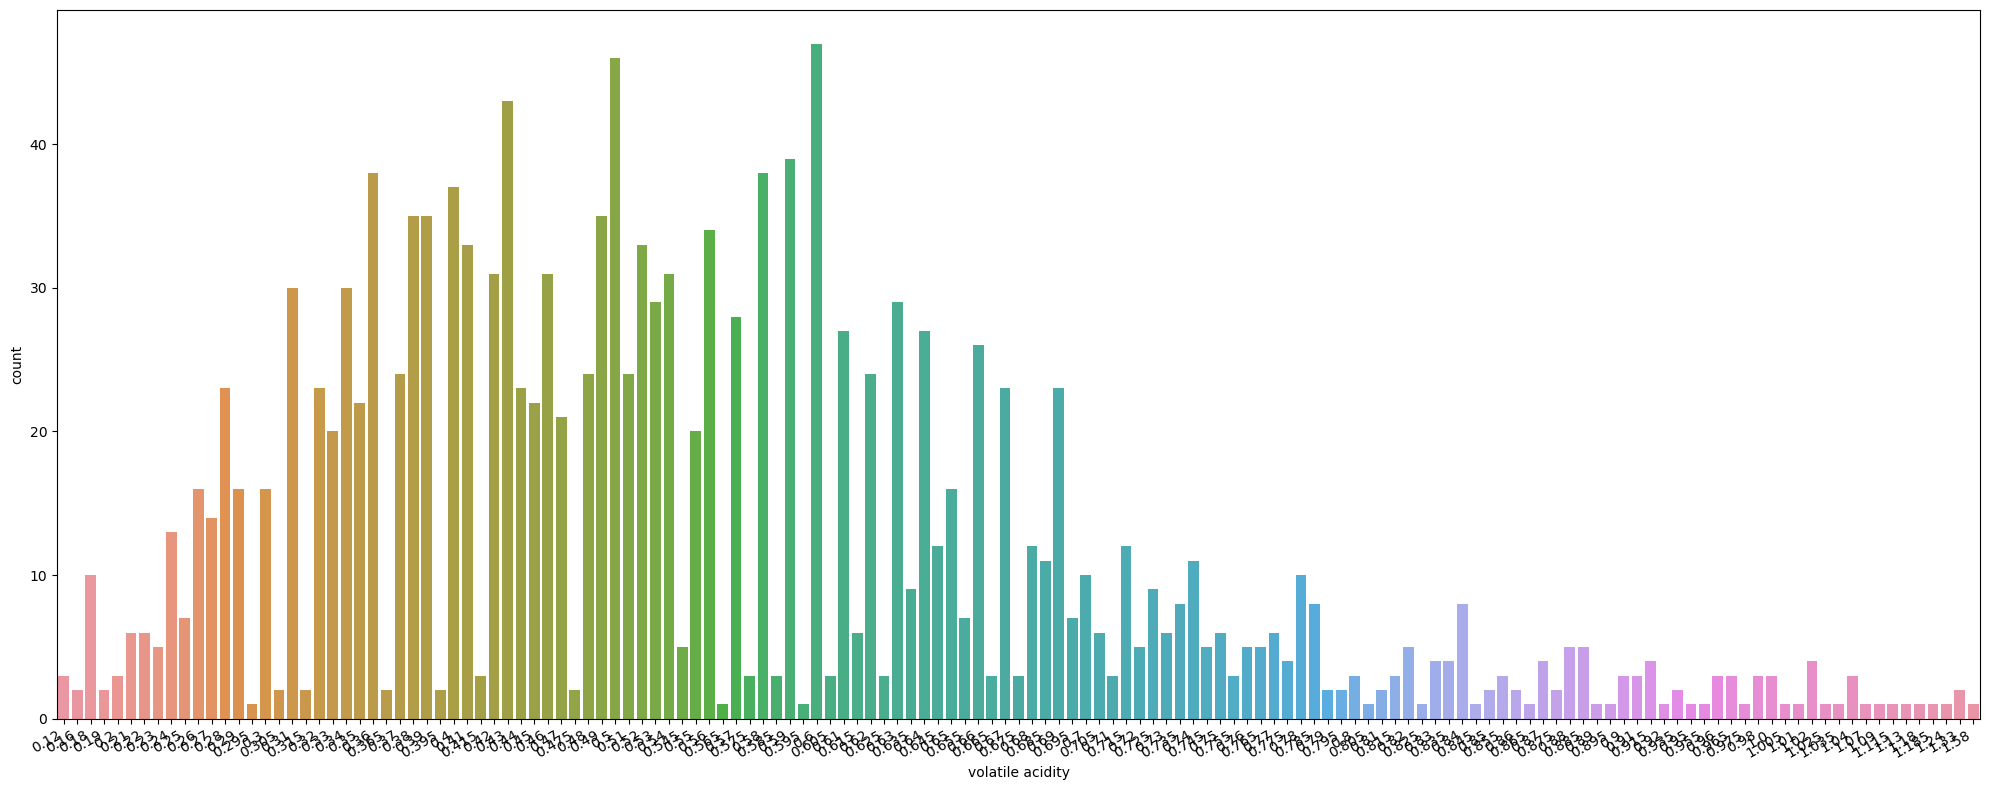

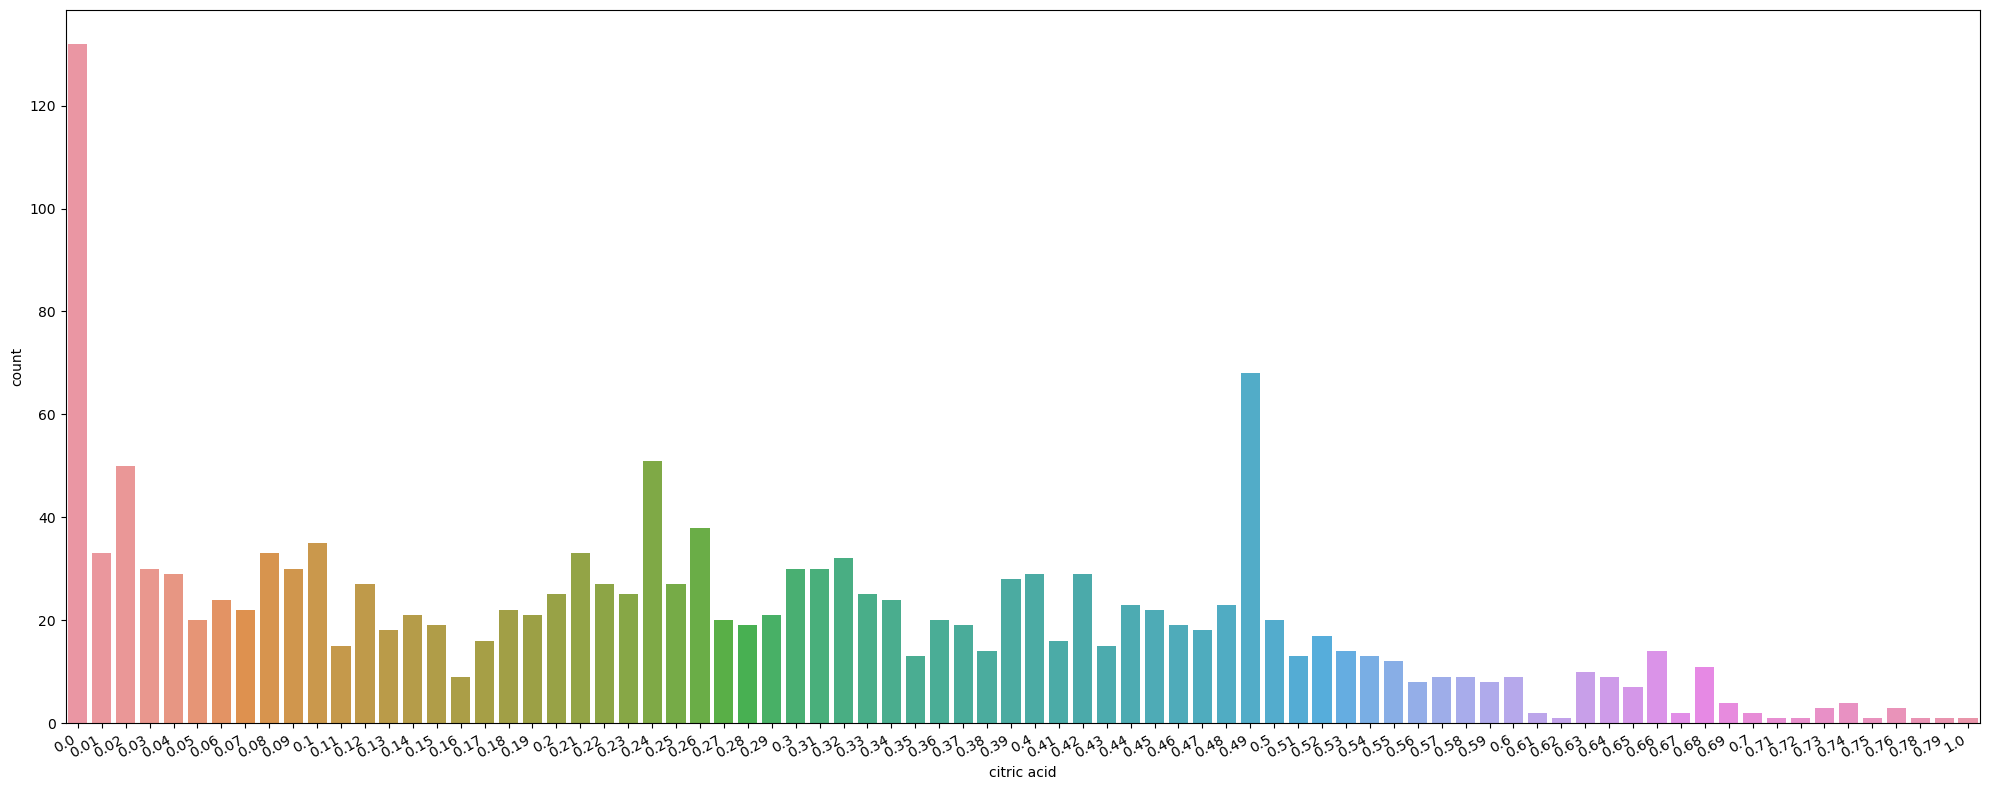

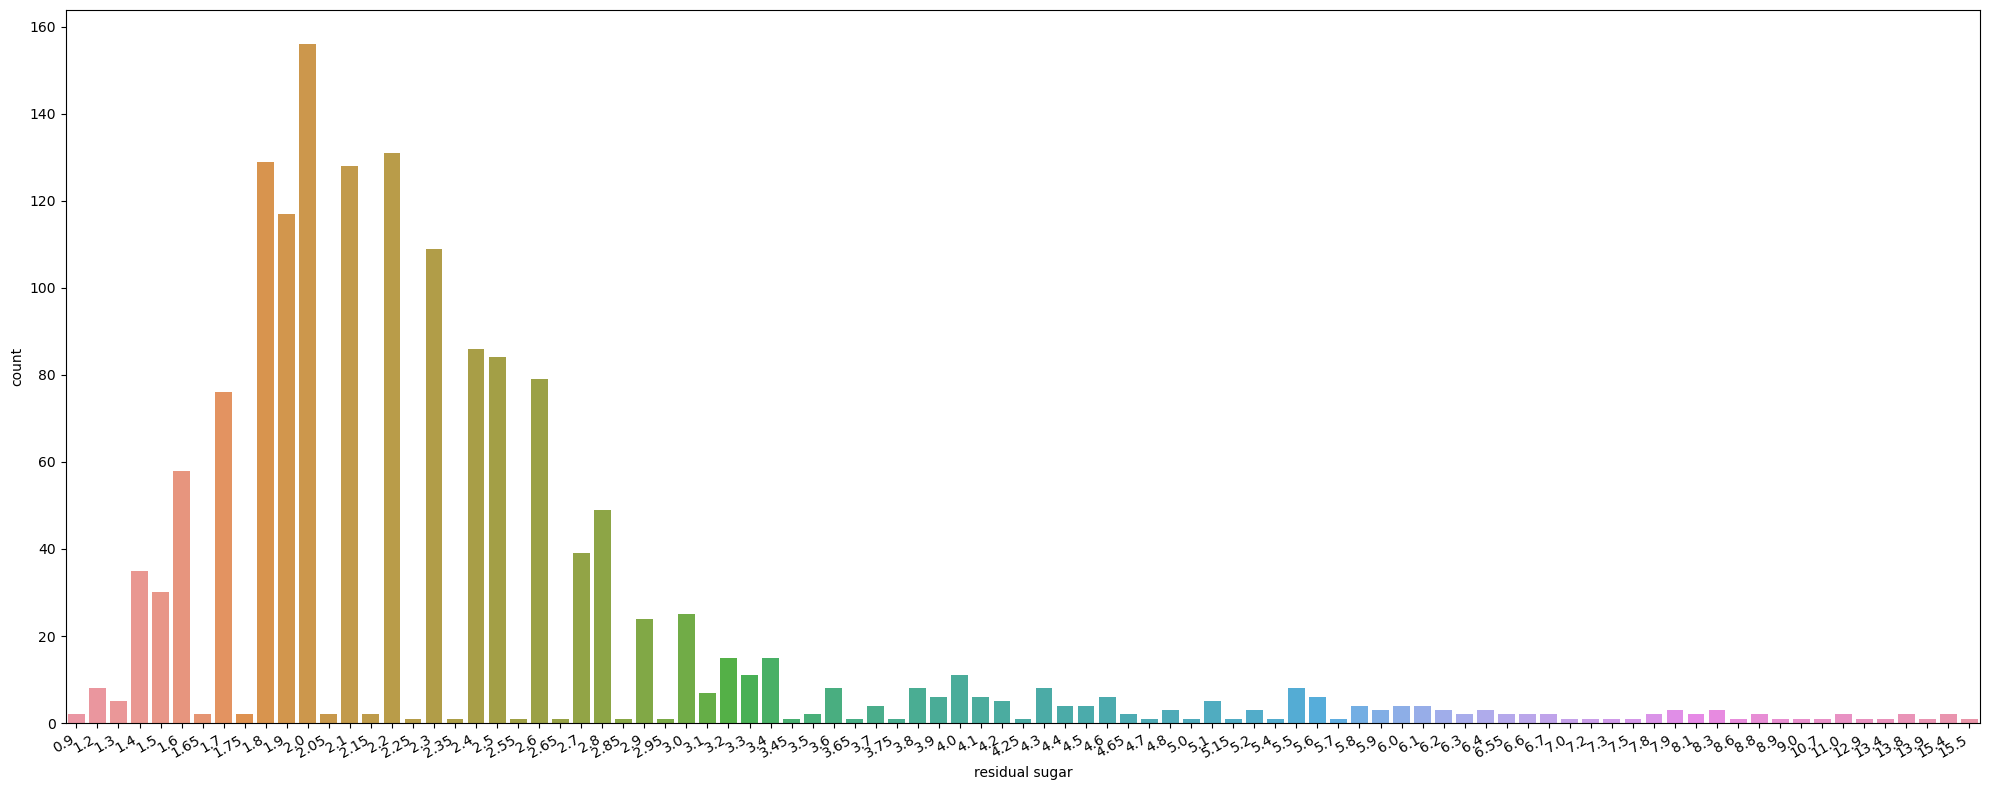

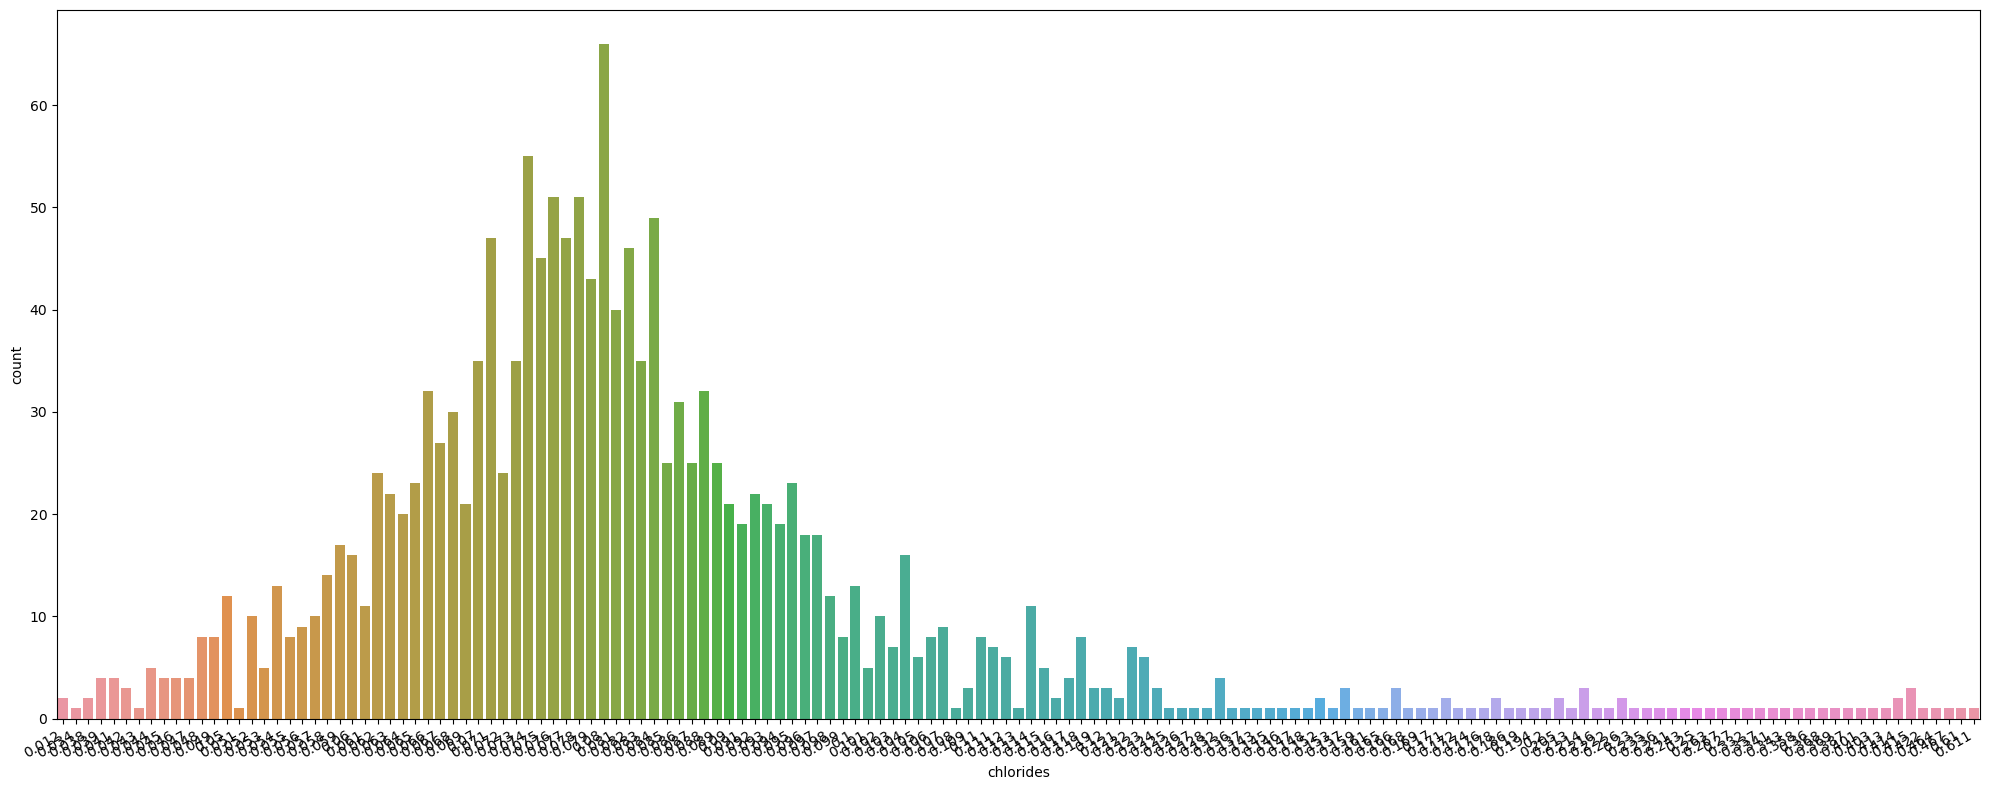

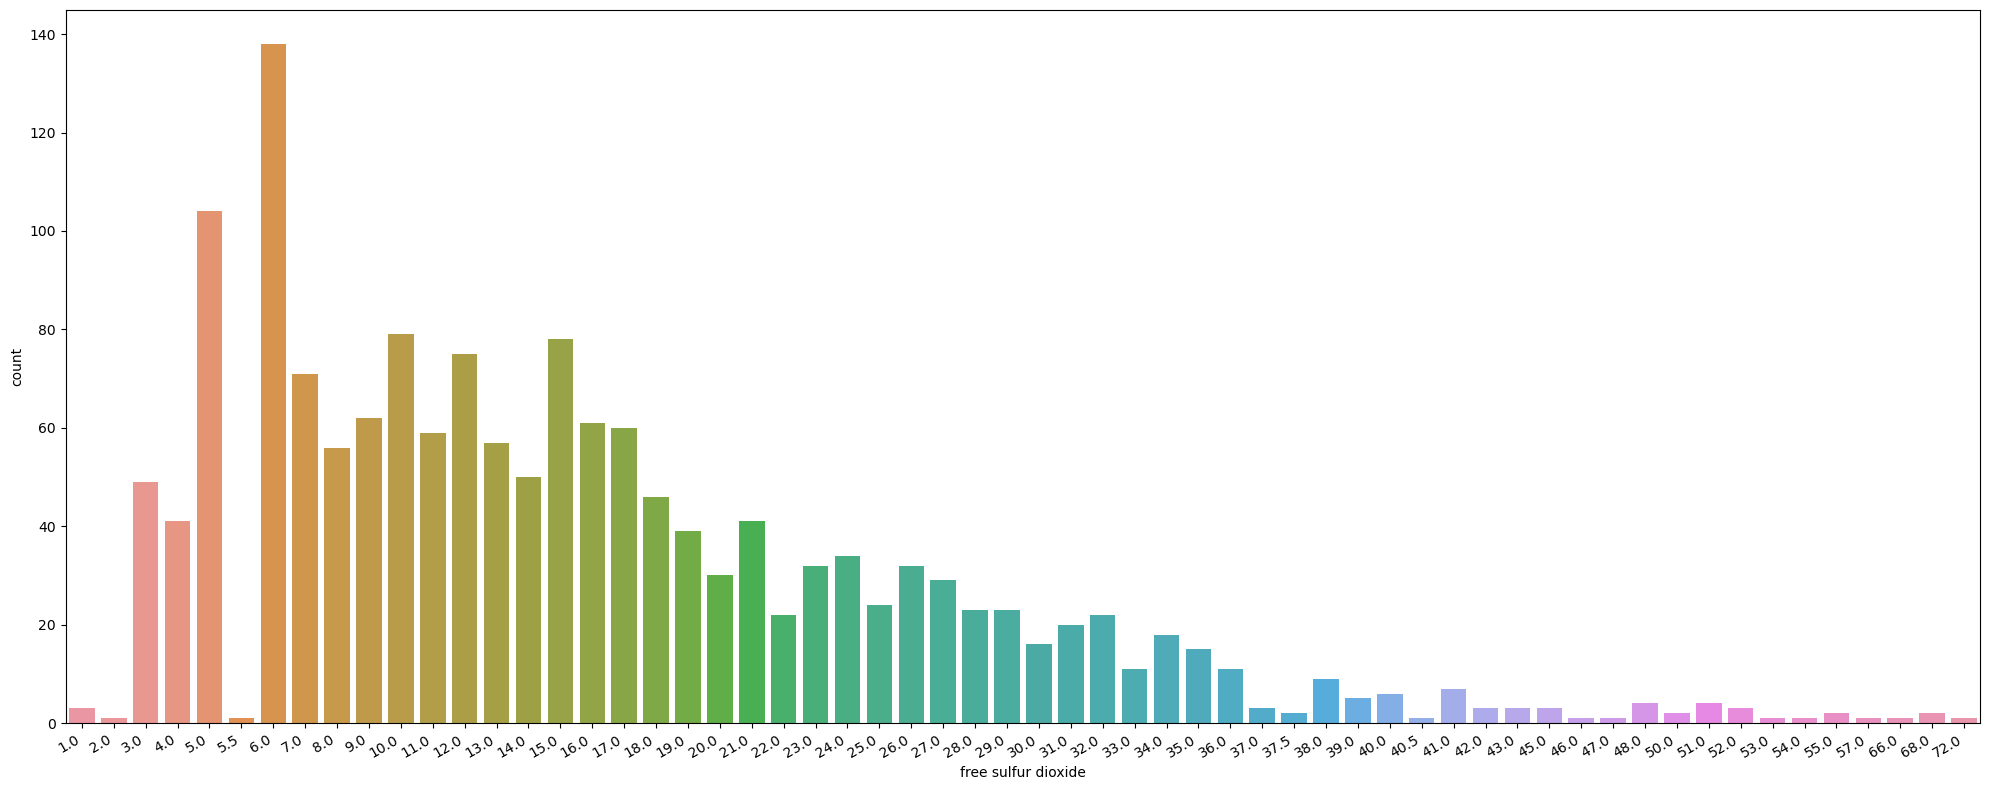

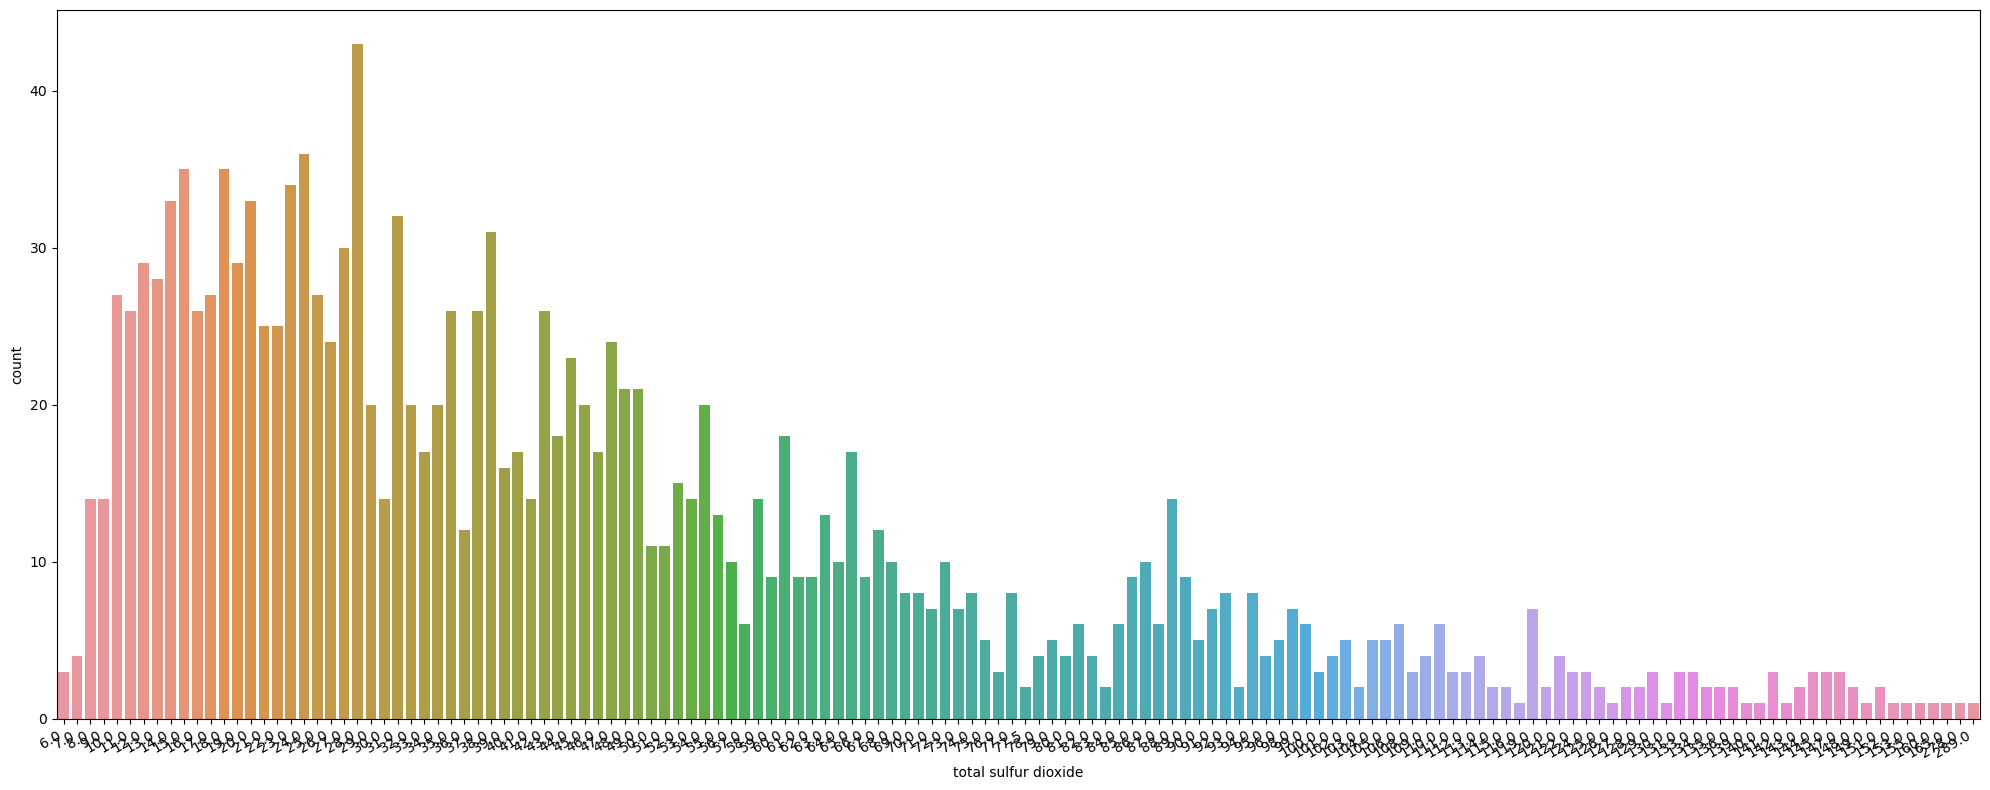

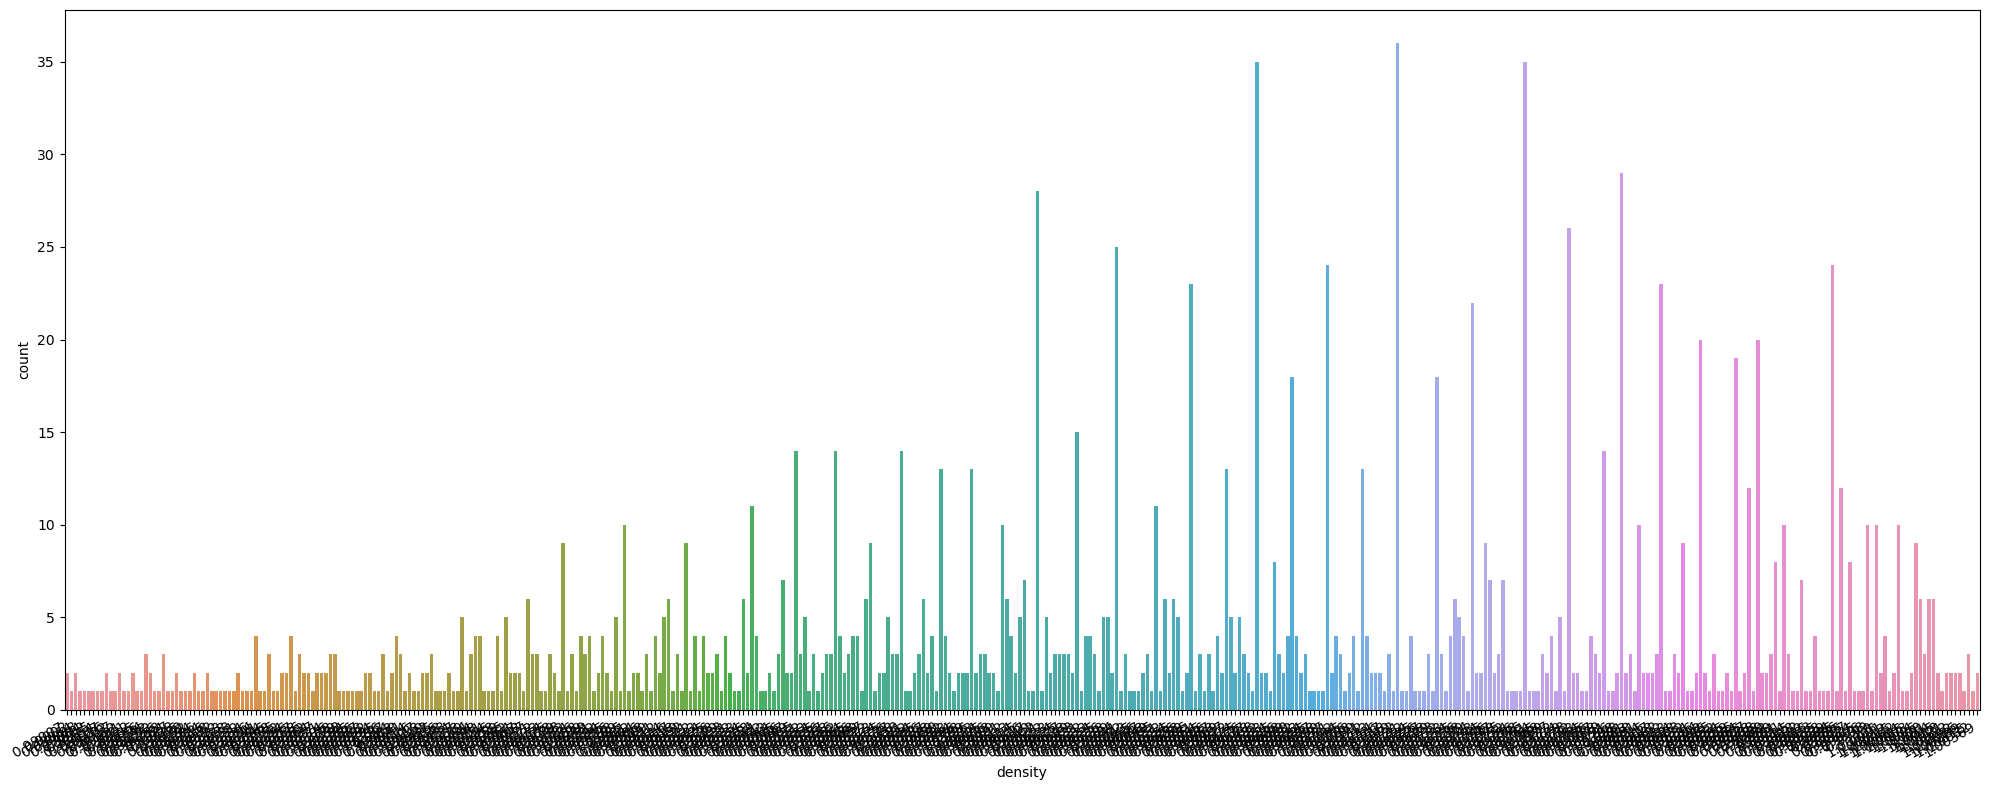

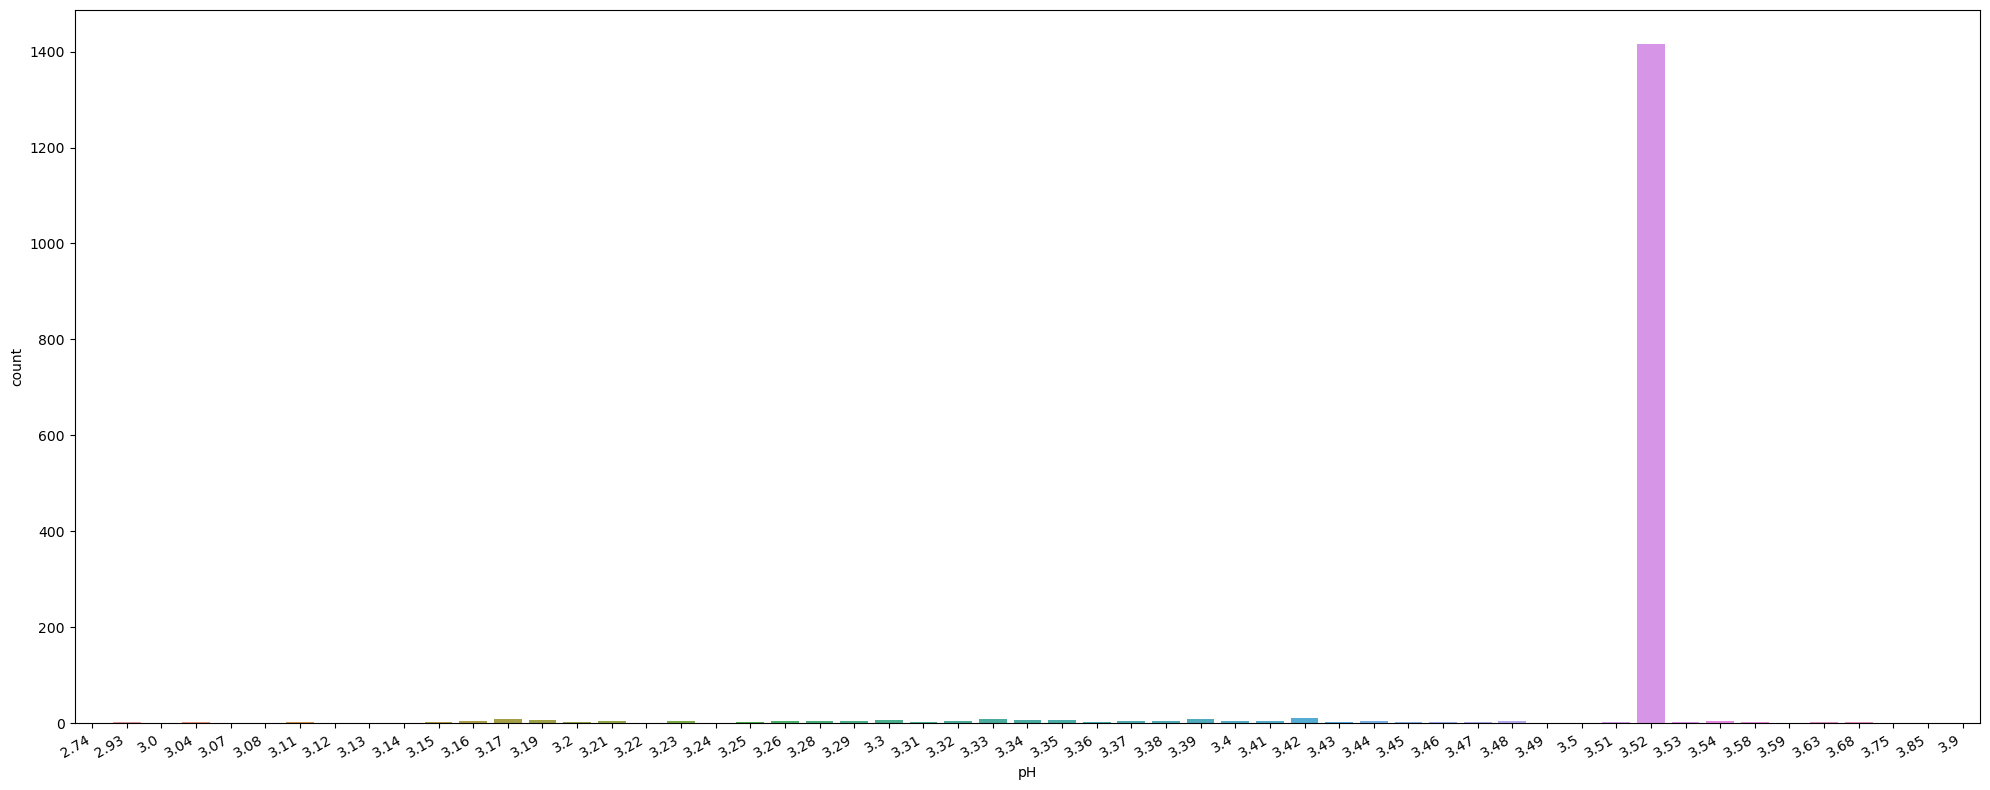

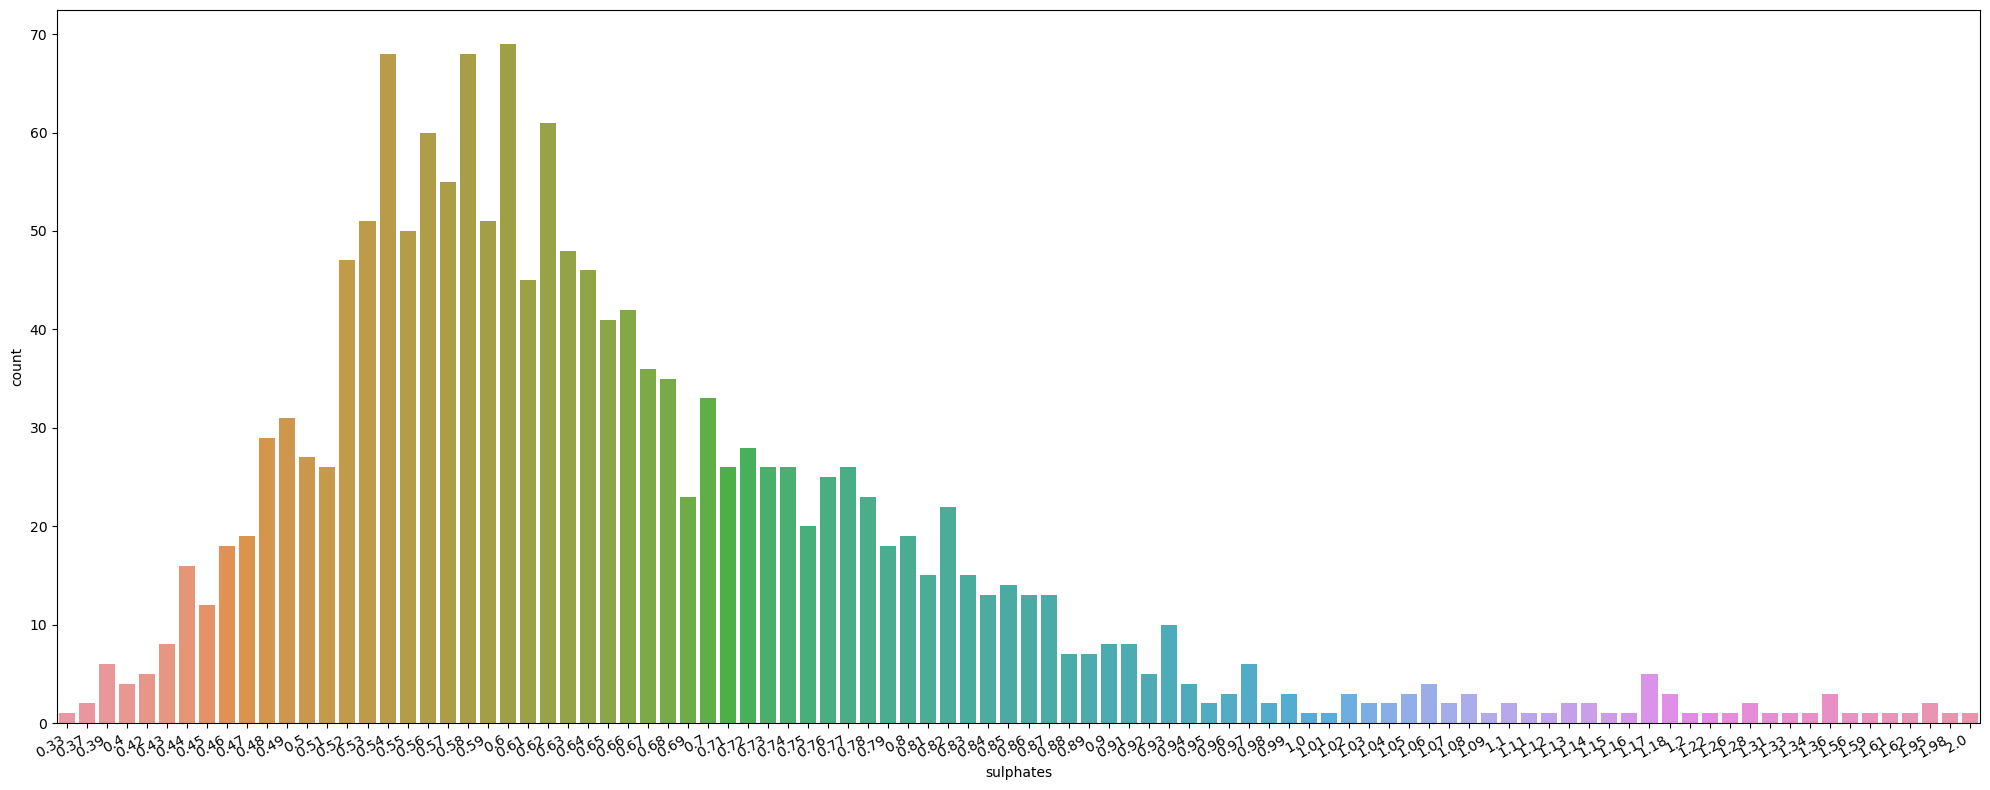

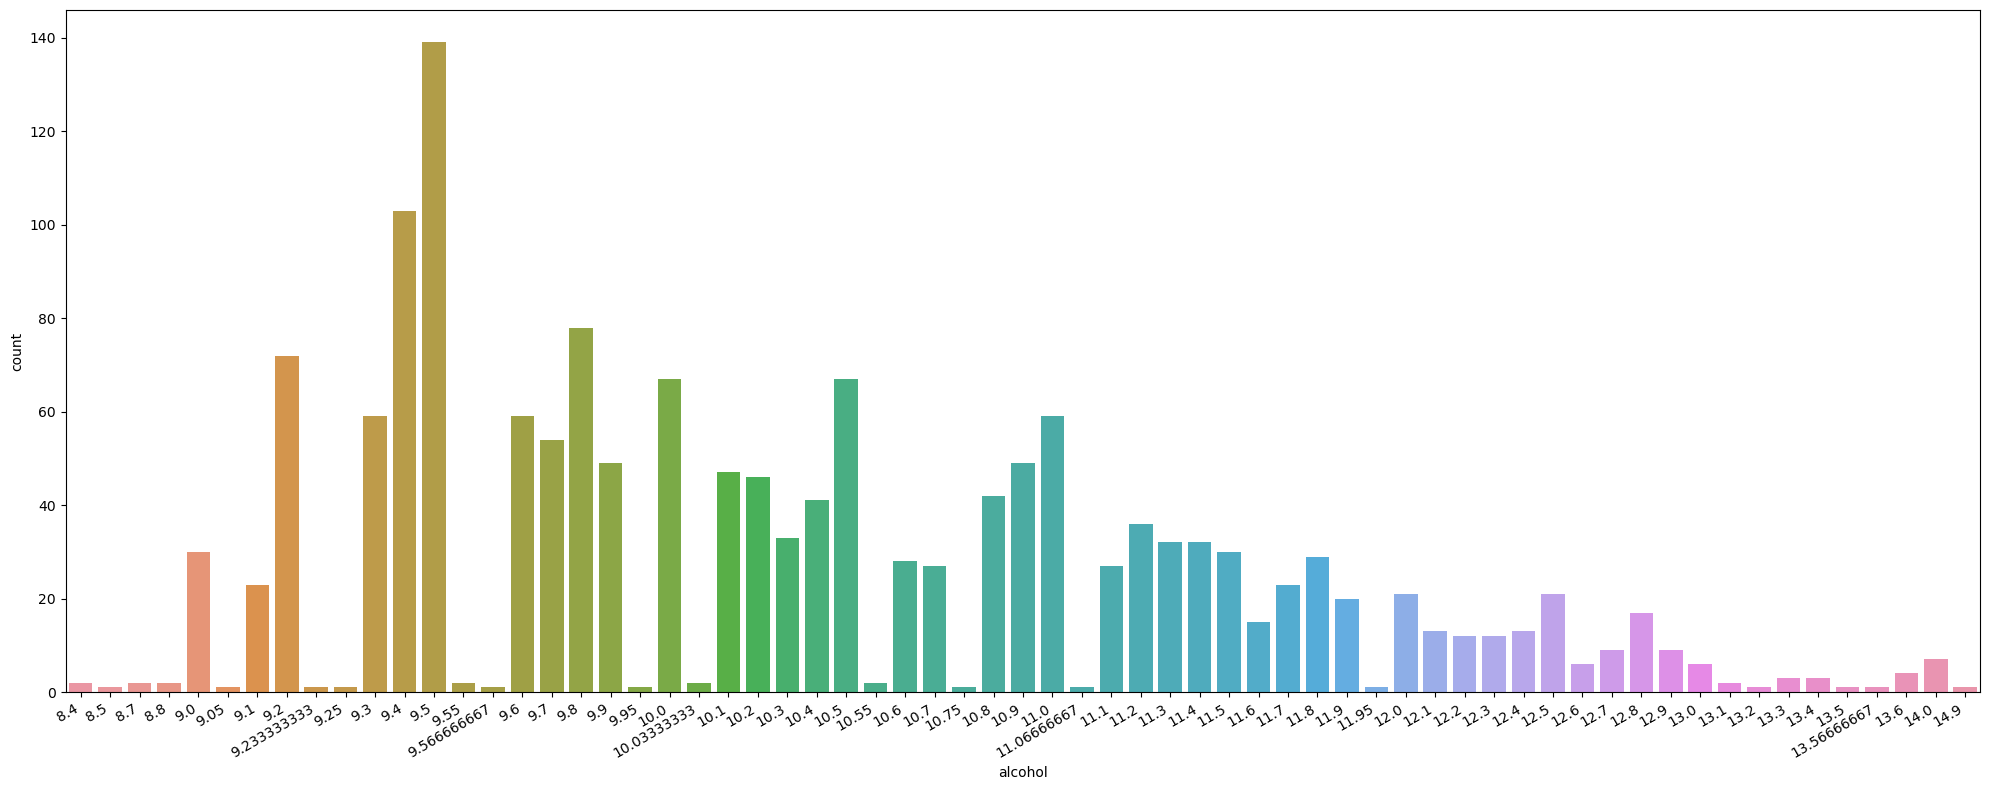

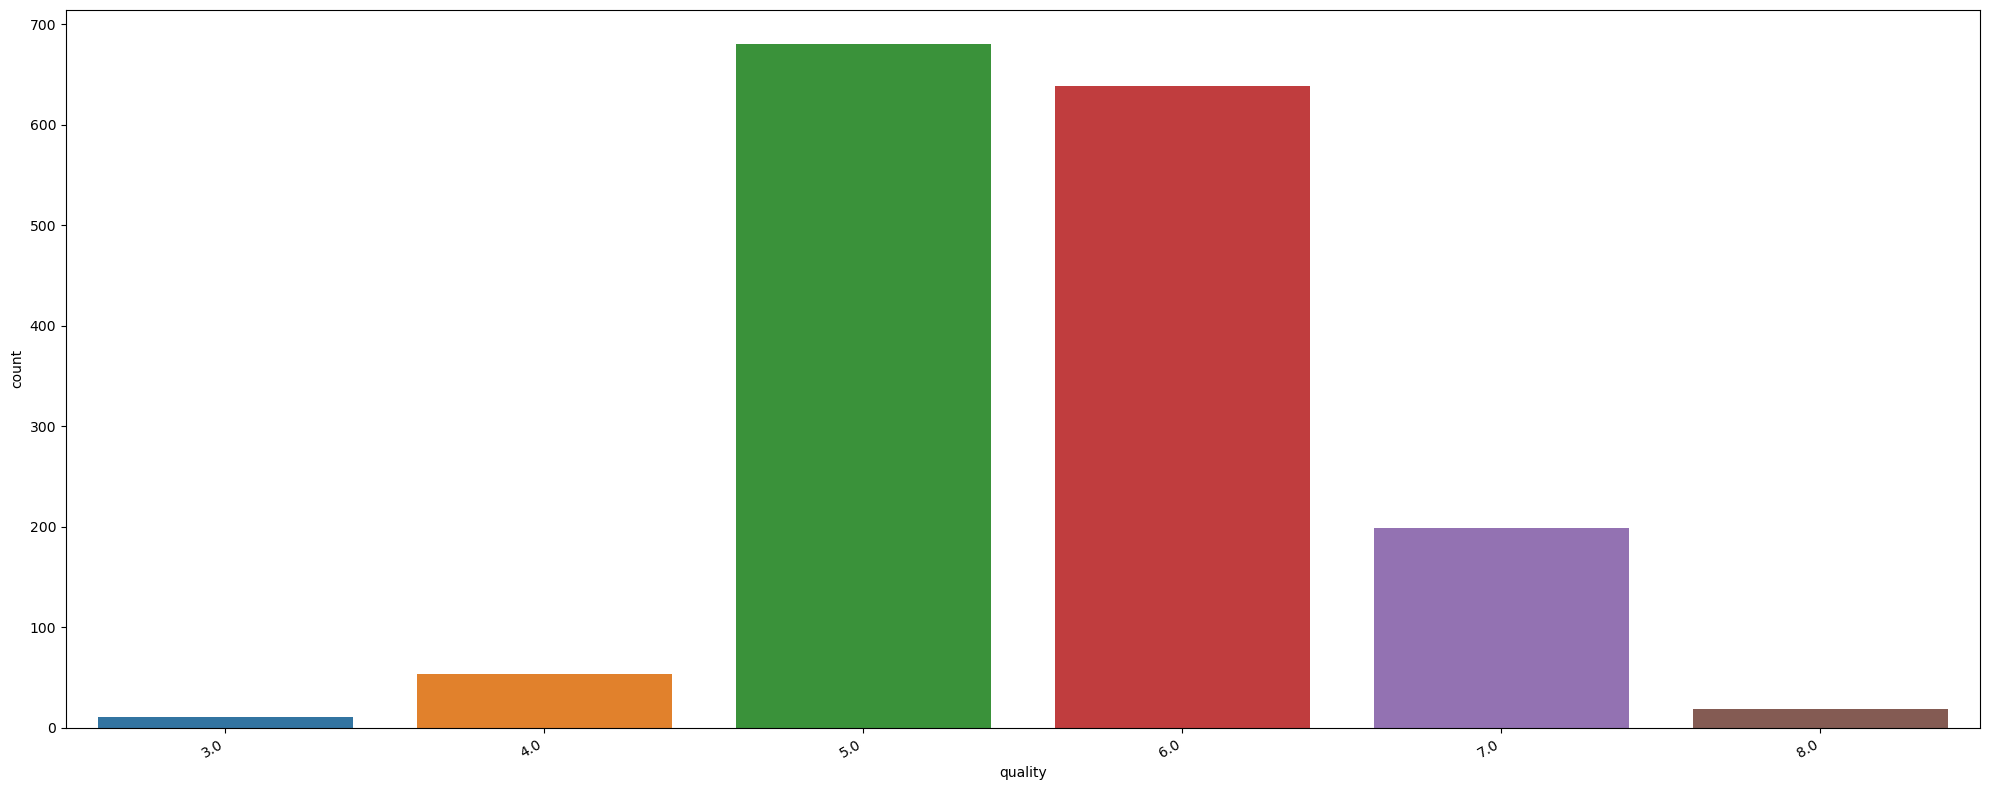

In [8]:
for i in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']:
    plt.figure(figsize=(20, 8))
    sns.countplot(data=df, x=i)
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()
    print('\n\n')

<Axes: >

<Figure size 640x480 with 0 Axes>

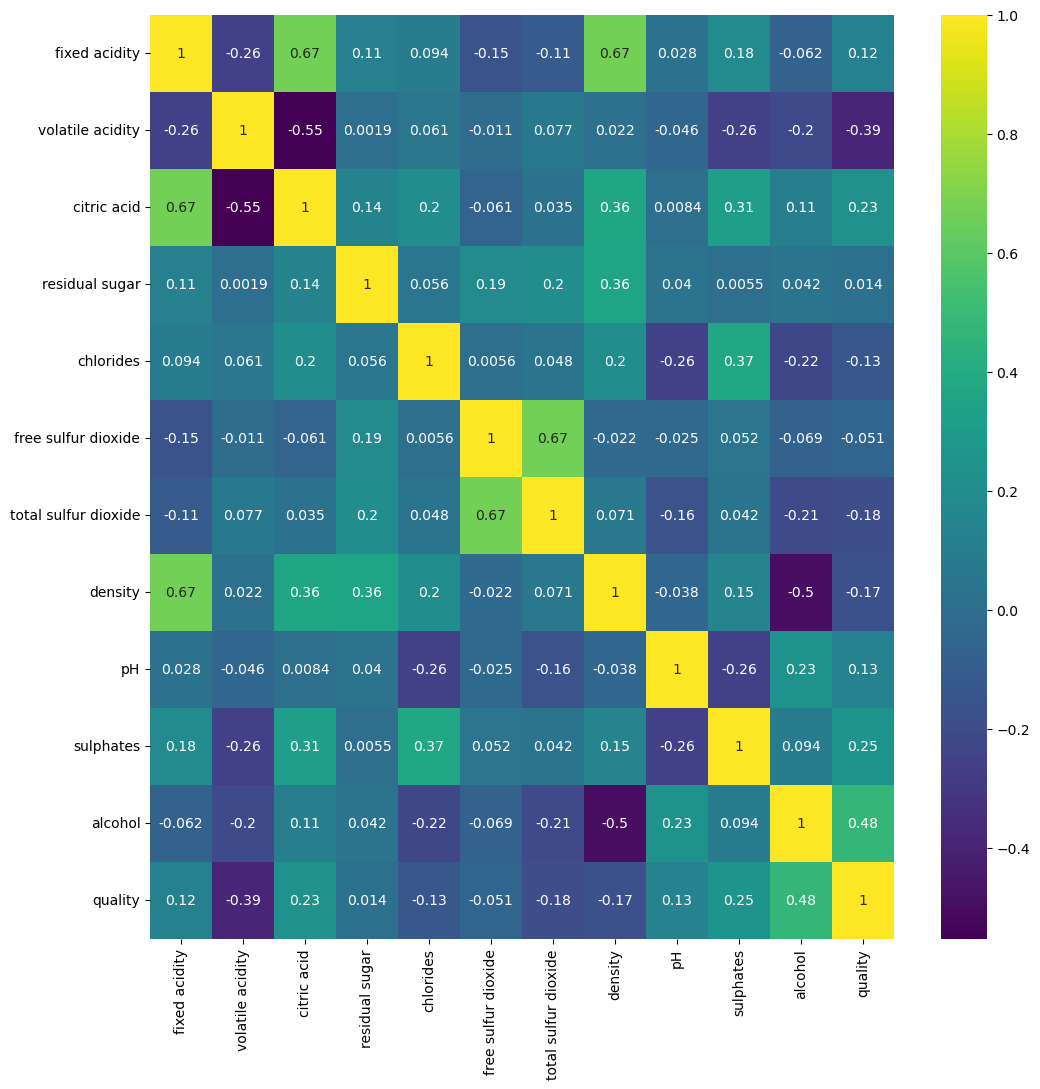

In [9]:
plt.clf()
corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, cmap='viridis',annot=True)

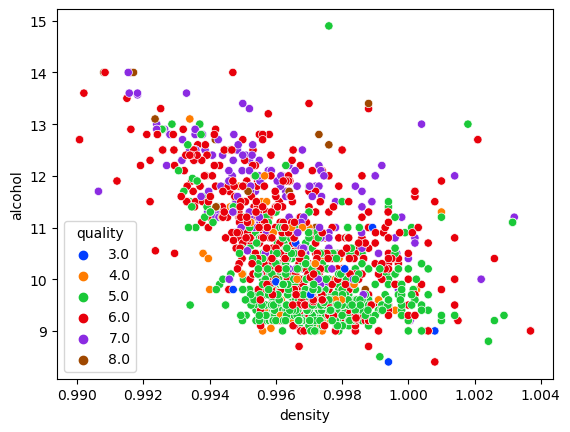

In [10]:
plt.clf()
sns.scatterplot(data=df, x='density', y='alcohol', hue='quality', palette="bright")
plt.show()

<Axes: xlabel='density', ylabel='alcohol'>

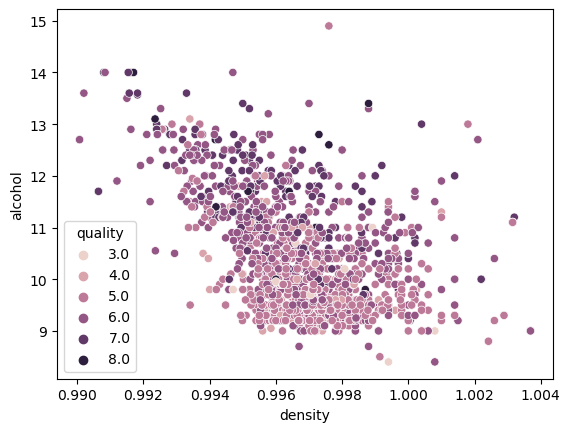

In [11]:
sns.scatterplot(x='density',y='alcohol',hue='quality',data=df)

<Axes: >

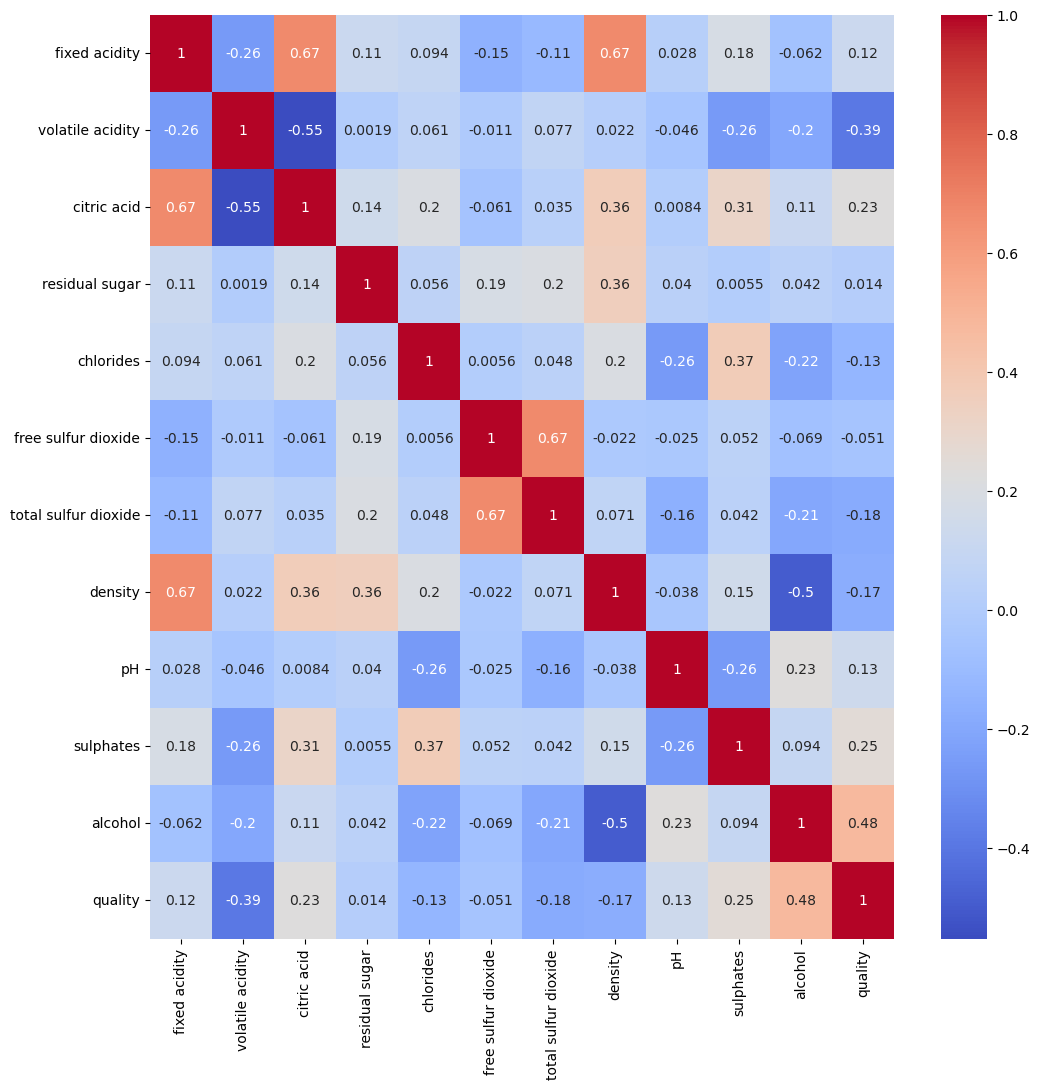

In [12]:
corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, cmap='coolwarm',annot=True)

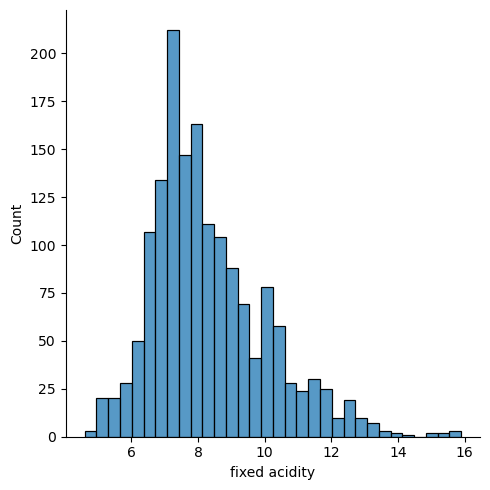

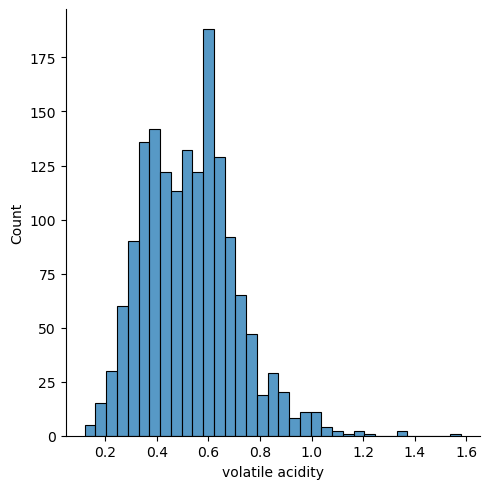

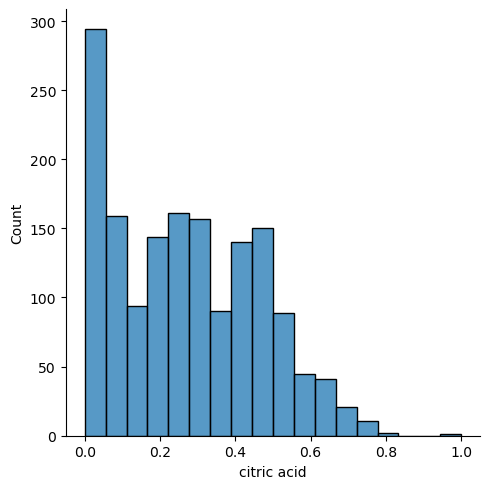

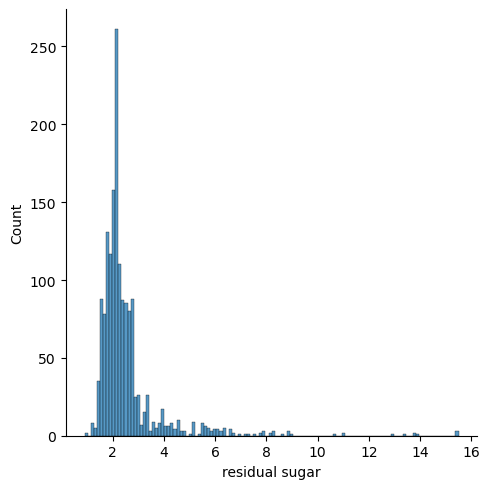

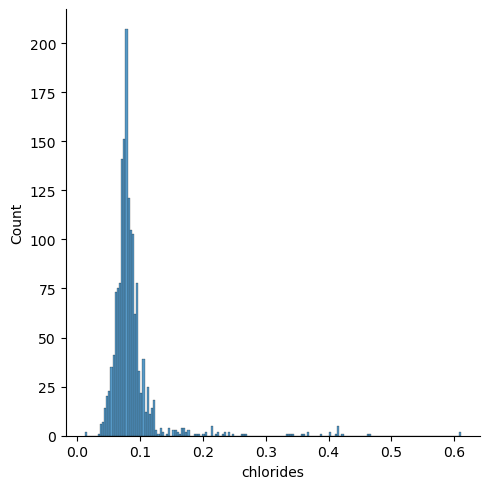

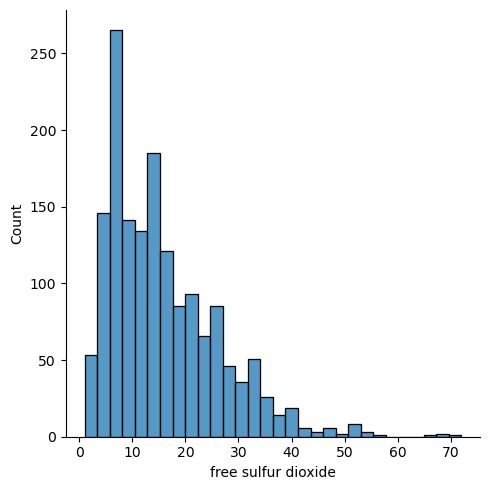

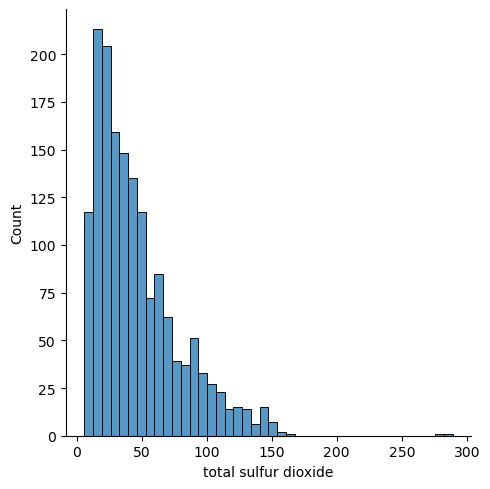

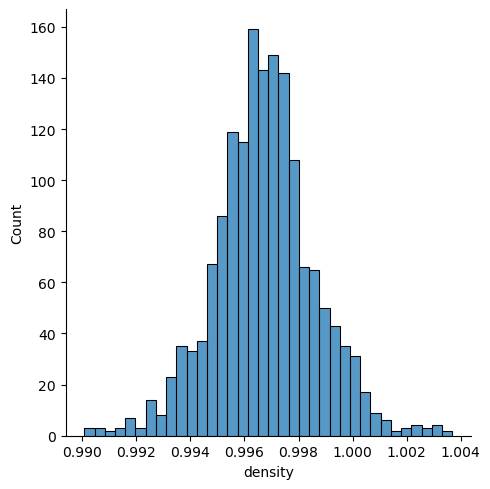

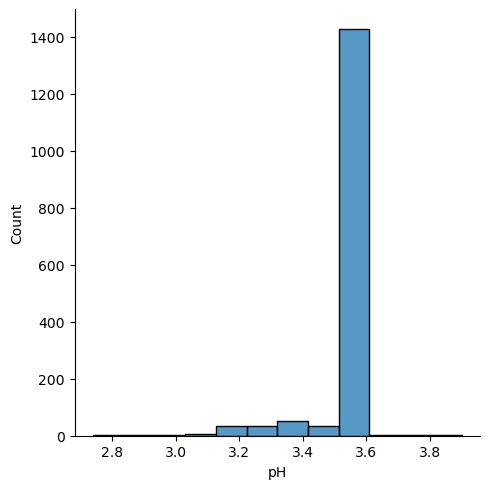

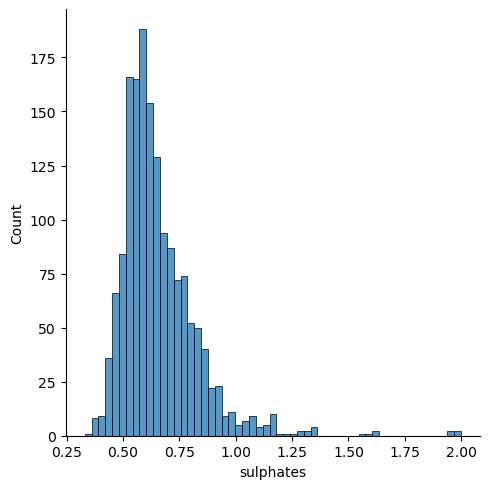

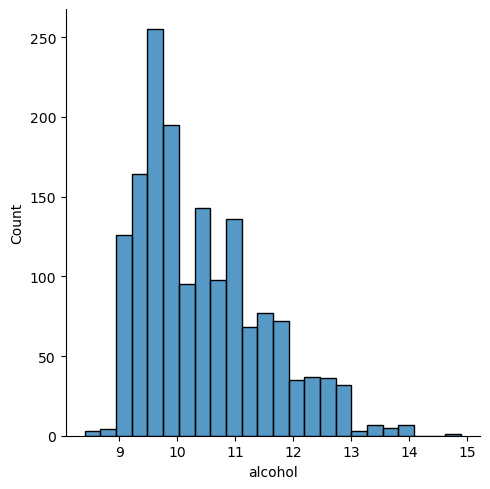

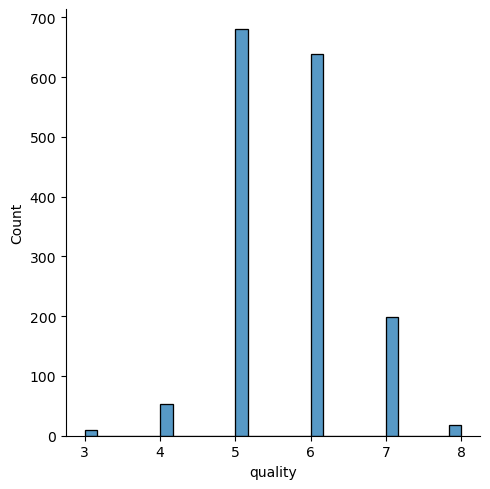

In [13]:
for column in df:
    sns.displot(x=column,data=df)

In [14]:
df = df.dropna()

In [15]:
X = df.drop('quality', axis=1)
y = df['quality']

## Importing 'train_test_split' and Splitting the Dataset into Train and Test Sets

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creating an instance of StandardScaler and Fit transform the data

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Creating and Fitting Isolation Model and Filtering Outliers from training data

In [18]:
from sklearn.ensemble import IsolationForest
outlier_detector = IsolationForest(contamination=0.1)
outliers = outlier_detector.fit_predict(X_train_scaled)
X_train_no_outliers = X_train_scaled[outliers == 1]
y_train_no_outliers = y_train[outliers == 1]

In [19]:
from sklearn.feature_selection import SelectKBest, f_regression
k = 5
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train_no_outliers, y_train_no_outliers)
X_test_selected = selector.transform(X_test_scaled)


## When dealing with Classification tasks

In [20]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_selected, y_train_no_outliers)
y_pred = classifier.predict(X_test_selected)

## When dealing with Regression tasks

In [21]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_selected, y_train_no_outliers)
y_pred_reg = regressor.predict(X_test_selected)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.50      0.08      0.14        12
         5.0       0.74      0.75      0.74       140
         6.0       0.58      0.70      0.63       122
         7.0       0.66      0.45      0.54        42
         8.0       1.00      0.33      0.50         3

    accuracy                           0.66       320
   macro avg       0.58      0.39      0.43       320
weighted avg       0.66      0.66      0.65       320

Confusion Matrix:
[[  0   0   1   0   0   0]
 [  0   1   6   5   0   0]
 [  0   0 105  34   1   0]
 [  0   1  28  85   8   0]
 [  0   0   2  21  19   0]
 [  0   0   0   1   1   1]]


In [23]:
print("Mean Squared Error for Regression:")
print(mean_squared_error(y_test, y_pred_reg))

Mean Squared Error for Regression:
0.3552815625


## Buliding Machine Learning Models

In [24]:
## Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
from sklearn.metrics import mean_squared_error,r2_score
def metrics(y_true, y_pred):
    print(f'RMSE :',mean_squared_error(y_true, y_pred)**0.5)
    print(f'R_squared :', r2_score(y_true, y_pred))

def accuracy(y_true, y_pred):
    errors = abs(y_true-y_pred)
    mape = 100*np.mean(errors/y_true)
    accuracy = 100-mape
    return accuracy

In [27]:
y_pred = model.predict(X_test)

In [28]:
metrics(y_test, y_pred)

RMSE : 0.66196921270751
R_squared : 0.3217549897998113


In [29]:
accuracy(y_test, y_pred)

90.57526289975752

In [30]:
## Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor
model_random_forest = RandomForestRegressor(n_estimators=500, min_samples_split=3)
model_random_forest.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=3, n_estimators=500)

In [32]:
pred_rf = model_random_forest.predict(X_test)

In [33]:
metrics(y_test, pred_rf)

RMSE : 0.5811720329250976
R_squared : 0.4772182254586774


In [34]:
accuracy(y_test, pred_rf)

92.20311494118481